# 6-2. 선형 회귀

1. 선형회귀

* 단순 선형회귀와 다중 선형회귀가 있지만 흔히 사용하는 것은 다중 선형회귀입니다.
* Feature가 한 개인 경우가 드물기 때문에 보통 feature가 두 개 이상인 다중 선형회귀를 만들게 됩니다.
2. 비용함수

* 데이터와 모델 간의 거리를 계산합니다.
* 비용함수(cost function) 또는 손실함수, 목적함수라 부르기도 합니다.
* 오차(error)를 계산합니다. (실제 값과 예측값의 차이)
* 평균 제곱 오차를 최소화하는 파라미터를 찾습니다.
3. 경사하강법

* 오차를 찾아 나가는 방식
* 비용함수의 기울기 절대값이 가장 작은 지점을 찾아서 오차가 작은 모델을 만듭니다.

In [ ]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1) 데이터 불러오기

In [ ]:
# 데이터 생성
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [ ]:
# train 샘플
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [ ]:
# 타겟 샘플
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

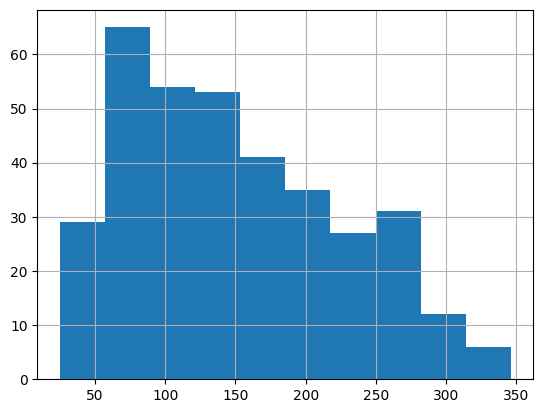

In [ ]:
# 타겟확인
y_train.hist()

## 2) 선형 회귀

In [ ]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2707.6318521641583

# 6-3. 릿지 회귀

1. 릿지 회귀

* 오버피팅 문제로 규제(regularization)를 적용한 모델
* 규제 방식: L2 규제
* 파라미터(alpha) 값을 활용해 조절
* alpha 값이 커질수록 회귀 계수 값을 작게 만듦
* 규제를 통해서 모델의 성능을 올릴 수 있습니다.

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3522.1191842072667

In [ ]:
# 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293421
sex,-71.448655
bmi,267.605962
bp,197.362492
s1,14.613257
s2,-13.884237
s3,-124.649836
s4,106.212967
s5,221.068493
s6,101.202546


In [ ]:
# 릿지 회귀 (alpha=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903383

In [ ]:
# 릿지 회귀 (alpha=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.884843903383

In [ ]:
# 회귀 계수 (alpha 0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha0.05
age,31.293421,16.703166
sex,-71.448655,-1.796418
bmi,267.605962,61.026376
bp,197.362492,47.434846
s1,14.613257,18.491238
s2,-13.884237,13.440104
s3,-124.649836,-35.542087
s4,106.212967,38.896140
s5,221.068493,55.276290
s6,101.202546,35.868345


# 6-4. 라쏘 회귀

1. 라쏘 회귀

* 오버피팅 문제로 규제(regularization)를 적용한 모델
* 규제 방식: L1 규제 (중요한 피처만 선택하는 특성)
* L2에 비해 회귀 계수를 급격히 감소시켜 중요하다고 생각하는 피처만 선택하고 * 나머지는 0으로 만듦
[리마인드] 규제 방식 비교

* 릿지 회귀 : L2 규제 방식
* 라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)

In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.152642946343

In [ ]:
# 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.589790
bp,46.369923
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.170617
s6,0.000000


In [ ]:
# 라쏘 회귀 (alpha=2)
model = Lasso(alpha=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179449031

In [ ]:
# 회귀 계수 (alpha=2)
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.589790,42.963888
bp,46.369923,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.170617,0.000000
s6,0.000000,0.000000


In [ ]:
# 라쏘 회귀 (alpha=0.05)
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4583679188177

In [ ]:
# 회귀 계수 (alpha=0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.948213
bmi,343.589790,42.963888,487.198584
bp,46.369923,0.000000,340.490360
s1,0.000000,0.000000,-95.576361
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.867452
s4,0.000000,0.000000,10.487703
s5,245.170617,0.000000,457.332197
s6,0.000000,0.000000,39.292925


# 6-5. 엘라스틱넷 회귀

1. 엘라스틱넷 회귀

* 오버피팅 문제로 규제(regularization)를 적용한 모델
* 규제 방식: L2 규제와 L1 규제 (중요한 피처만 선택하는 특성) 결합
*시간이 상대적으로 오래 걸림


[리마인드] 규제방식 비교

* 릿지 회귀 : L2 규제 방식
* 라쏘 회귀 : L1 규제 방식 (중요한 피처만 선택하는 특성)
* 엘라스틱넷 회귀 : L2+L1 규제 결합 방식

## 1) 엘라스틱넷 회귀

In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270961171604

In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6031657225312

# 6-6. 랜덤포레스트 & xgboost

[리마인드] 랜덤포레스트 VS XGBoost

1. 랜덤포레스트

* 여러 개의 의사결정 트리로 구성
* 앙상블 방법 중 배깅(bagging) 방식
* 부트스트랩 샘플링 (데이터셋 중복 허용)
* 최종 다수결 투표

2. XGBoost

* 트리 앙상블 중 성능이 좋은 알고리즘
* eXtreme Gradient Boosting을 줄여서 XGBoost라고 한다.
* 약한 학습기가 계속해서 업데이트를 하며 좋은 모델을 만들어 간다.


## 1) 랜덤포레스트

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3271.337473033708

## 2) XGBoost


In [ ]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4265.475533439266

# 6-7. 하이퍼파라미터 튜닝

모델의 성능 향상을 위해 하이퍼파라미터 튜닝을 진행하며 사이킷런의 model_selection에서 제공하는 GridSearchCV와 RandomizedSearchCV를 이용하여 최적화할 수 있습니다.

1. GridSearchCV

* grid search를 통해 최적의 하이퍼파라미터를 찾음 (시간 오래 걸림)

2. RandomizedSearchCV

* RandomizedSearchCV 는 GridSearchCV와 달리 랜덤으로 N개의 조합만 탐색함
(시간 내 최적의 하이퍼파라미터 탐색)

## 1) 데이터셋 로드

In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# 하이퍼파라미터
# 시간이 오래 걸려 learning_rate와 subsample는 주석 처리함
params={# 'learning_rate':[0.07, 0.05],
        'max_depth':[3, 5, 7],
        'n_estimators':[100, 200],
        # 'subsample':[0.9, 0.8, 0.7]
        }

In [ ]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

## 2) GridSearchCV

In [ ]:
# GridSearchCV
#  'max_depth':[3, 5, 7],  'n_estimators':[100, 200]만 적용 시 3분 내외
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [100, 200]})

In [ ]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample =0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3020.722217577996

##  3) RandomizedSearchCV

In [ ]:
#  Randomized Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]})

In [ ]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'n_estimators': 100, 'max_depth': 5}

# 6-8. 평가(회귀)

## 1) 평가 (회귀)

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

46.60036254197024

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3020.722217577996

In [ ]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

54.96109731053408

In [ ]:
# RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.423941373573131

In [ ]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5386462845667569

1. 선형 회귀, 릿지, 라쏘, 엘라스틱넷

* 회귀 모델과 규제

2. 비용함수, 손실함수, 목적함수

* 오차(error)를 줄이기 위한 함수

3. 평가(회귀)

* MAE, MSE, RMSE, RMSLE, R2